# HIMACHAL PARDESH

In [176]:
import pandas as pd

# 1. Load the three Himachal Pradesh datasets
df_hp_enrolment = pd.read_csv('/content/Himachal Pardesh Enrolment Dataset.csv')
df_hp_demographic = pd.read_csv('/content/Himachal Pardesh Demographic Dataset.csv')
df_hp_biometric = pd.read_csv('/content/Himachal Pardesh Biometric Dataset.csv')

# Print head, info, and describe for each loaded DataFrame
print("Himachal Pradesh Enrolment Dataset:")
print(df_hp_enrolment.head())
print(df_hp_enrolment.info())
print(df_hp_enrolment.describe())

print("\nHimachal Pradesh Demographic Dataset:")
print(df_hp_demographic.head())
print(df_hp_demographic.info())
print(df_hp_demographic.describe())

print("\nHimachal Pradesh Biometric Dataset:")
print(df_hp_biometric.head())
print(df_hp_biometric.info())
print(df_hp_biometric.describe())

Himachal Pradesh Enrolment Dataset:
         date             state  district  pincode  age_0_5  age_5_17  \
0  01-09-2025  Himachal Pradesh  Bilaspur   174021        2         0   
1  01-09-2025  Himachal Pradesh  Bilaspur   174033        1         0   
2  01-09-2025  Himachal Pradesh  Bilaspur   174035        1         0   
3  01-09-2025  Himachal Pradesh  Hamirpur   177001        3         0   
4  01-09-2025  Himachal Pradesh  Hamirpur   177020        4         0   

   age_18_greater  
0               0  
1               0  
2               0  
3               0  
4               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12371 entries, 0 to 12370
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            12371 non-null  object
 1   state           12371 non-null  object
 2   district        12371 non-null  object
 3   pincode         12371 non-null  int64 
 4   age_0_5         12371 non-nu

In [177]:
# 3. Convert 'date' columns to datetime objects
df_hp_enrolment['date'] = pd.to_datetime(df_hp_enrolment['date'], format='%d-%m-%Y')
df_hp_demographic['date'] = pd.to_datetime(df_hp_demographic['date'], format='%d-%m-%Y')
df_hp_biometric['date'] = pd.to_datetime(df_hp_biometric['date'], format='%d-%m-%Y')

# 4. Perform an 'outer' merge of df_hp_enrolment and df_hp_demographic
merged_hp_df_temp = pd.merge(df_hp_enrolment, df_hp_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')

# Then, merge this temporary DataFrame with df_hp_biometric
df_merged_hp = pd.merge(merged_hp_df_temp, df_hp_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# 5. Identify all numerical columns and replace NaN values in these columns with 0
numeric_cols = df_merged_hp.select_dtypes(include=['number']).columns
df_merged_hp[numeric_cols] = df_merged_hp[numeric_cols].fillna(0)

# 6. After preprocessing, display the first few rows, info, and descriptive statistics
print("\nMerged Himachal Pradesh DataFrame (df_merged_hp) head:")
print(df_merged_hp.head())
print("\nMerged Himachal Pradesh DataFrame (df_merged_hp) info:")
print(df_merged_hp.info())
print("\nMerged Himachal Pradesh DataFrame (df_merged_hp) describe:")
print(df_merged_hp.describe())


Merged Himachal Pradesh DataFrame (df_merged_hp) head:
        date             state  district  pincode  age_0_5  age_5_17  \
0 2025-03-01  Himachal Pradesh  Bilaspur   174001      0.0       0.0   
1 2025-03-01  Himachal Pradesh  Bilaspur   174001      0.0       0.0   
2 2025-03-01  Himachal Pradesh  Bilaspur   174002      0.0       0.0   
3 2025-03-01  Himachal Pradesh  Bilaspur   174003      0.0       0.0   
4 2025-03-01  Himachal Pradesh  Bilaspur   174004      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0             0.0           20.0         234.0         127.0        235.0  
1             0.0           20.0         234.0         127.0        235.0  
2             0.0            0.0           0.0          38.0         69.0  
3             0.0            0.0           0.0          21.0         36.0  
4             0.0           10.0          61.0          51.0         71.0  

Merged Himachal Pradesh DataFrame (df_merged_hp) info:

In [178]:
df_hp = df_merged_hp[df_merged_hp['state'] == 'Himachal Pradesh'].copy()
df_hp['year'] = df_hp['date'].dt.year
df_hp['month'] = df_hp['date'].dt.month

age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_hp_agg = df_hp.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

import numpy as np

# 1. Create 'totalenrolments' column
df_hp_agg['totalenrolments'] = df_hp_agg['age_0_5'] + df_hp_agg['age_5_17'] + df_hp_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_hp_agg['childenrolments'] = df_hp_agg['age_0_5'] + df_hp_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_hp_agg['totaldemoupdates'] = df_hp_agg['demo_age_5_17'] + df_hp_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_hp_agg['totalbioupdates'] = df_hp_agg['bio_age_5_17'] + df_hp_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_hp_agg['CES'] = np.where(
    df_hp_agg['totalenrolments'] == 0,
    0,
    df_hp_agg['childenrolments'] / df_hp_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_hp_agg['DUR'] = np.where(
    df_hp_agg['totalenrolments'] == 0,
    0,
    df_hp_agg['totaldemoupdates'] / df_hp_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_hp_agg['BUR'] = np.where(
    df_hp_agg['totalenrolments'] == 0,
    0,
    df_hp_agg['totalbioupdates'] / df_hp_agg['totalenrolments']
)

print("Shape of df_hp:", df_hp.shape)
print("\nFirst 5 rows of df_hp with new 'year' and 'month' columns:")
print(df_hp.head())
print("\nAggregated DataFrame (df_hp_agg) head:")
print(df_hp_agg.head())
print("\nAggregated DataFrame (df_hp_agg) info:")
print(df_hp_agg.info())

Shape of df_hp: (106680, 13)

First 5 rows of df_hp with new 'year' and 'month' columns:
        date             state  district  pincode  age_0_5  age_5_17  \
0 2025-03-01  Himachal Pradesh  Bilaspur   174001      0.0       0.0   
1 2025-03-01  Himachal Pradesh  Bilaspur   174001      0.0       0.0   
2 2025-03-01  Himachal Pradesh  Bilaspur   174002      0.0       0.0   
3 2025-03-01  Himachal Pradesh  Bilaspur   174003      0.0       0.0   
4 2025-03-01  Himachal Pradesh  Bilaspur   174004      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  \
0             0.0           20.0         234.0         127.0        235.0   
1             0.0           20.0         234.0         127.0        235.0   
2             0.0            0.0           0.0          38.0         69.0   
3             0.0            0.0           0.0          21.0         36.0   
4             0.0           10.0          61.0          51.0         71.0   

   year  month 

In [179]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_hp_agg['Enorm'] = df_hp_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_hp_agg['Dnorm'] = df_hp_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year', and 'state'
df_hp_agg['Bnorm'] = df_hp_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_hp_agg['stdnorm'] = (df_hp_agg['Enorm'] + df_hp_agg['Dnorm'] + df_hp_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_hp_agg['ALBI'] = 1 - df_hp_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_hp_agg['ALBI'] = df_hp_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_hp_agg) with normalized metrics and ALBI head:")
print(df_hp_agg.head())

Aggregated DataFrame (df_hp_agg) with normalized metrics and ALBI head:
   year  month             state  district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Himachal Pradesh  Bilaspur      0.0       0.0             0.0   
1  2025      3  Himachal Pradesh    Chamba      0.0       0.0             0.0   
2  2025      3  Himachal Pradesh  Hamirpur      0.0       0.0             0.0   
3  2025      3  Himachal Pradesh    Kangra      0.0       0.0             0.0   
4  2025      3  Himachal Pradesh   Kinnaur      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...  totaldemoupdates  \
0          150.0        1198.0        1189.0  ...            1348.0   
1         1038.0        4043.0        1955.0  ...            5081.0   
2           83.0         535.0        1265.0  ...             618.0   
3          753.0        6434.0        4706.0  ...            7187.0   
4            0.0           0.0         145.0  ...               0.0   

   totalbioupd

In [180]:
df_hp_agg['Enormrisk'] = 1 - df_hp_agg['Enorm']
df_hp_agg['CESrisknorm'] = 1 - df_hp_agg['CES']
df_hp_agg['DURrisknorm'] = 1 - df_hp_agg['DUR']
df_hp_agg['BURrisknorm'] = 1 - df_hp_agg['BUR']
df_hp_agg['ALBIrisknorm'] = 1 - df_hp_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_hp_agg['riskscore'] = (
    df_hp_agg['Enormrisk'] +
    df_hp_agg['CESrisknorm'] +
    df_hp_agg['DURrisknorm'] +
    df_hp_agg['BURrisknorm'] +
    df_hp_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_hp_agg) with risk components and riskscore head:")
print(df_hp_agg.head())

Aggregated DataFrame (df_hp_agg) with risk components and riskscore head:
   year  month             state  district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Himachal Pradesh  Bilaspur      0.0       0.0             0.0   
1  2025      3  Himachal Pradesh    Chamba      0.0       0.0             0.0   
2  2025      3  Himachal Pradesh  Hamirpur      0.0       0.0             0.0   
3  2025      3  Himachal Pradesh    Kangra      0.0       0.0             0.0   
4  2025      3  Himachal Pradesh   Kinnaur      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm     Bnorm  \
0          150.0        1198.0        1189.0  ...  0.122993  0.124766   
1         1038.0        4043.0        1955.0  ...  0.463595  0.218857   
2           83.0         535.0        1265.0  ...  0.056387  0.122151   
3          753.0        6434.0        4706.0  ...  0.655748  0.443100   
4            0.0           0.0         145.0  ...  0.000000  0.014791   



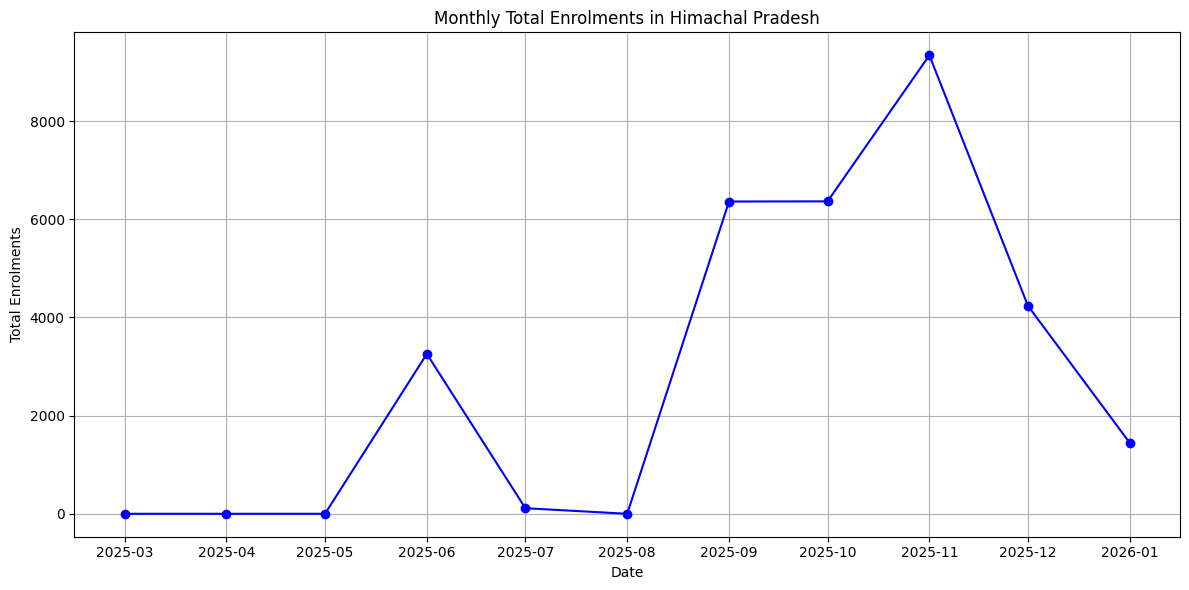

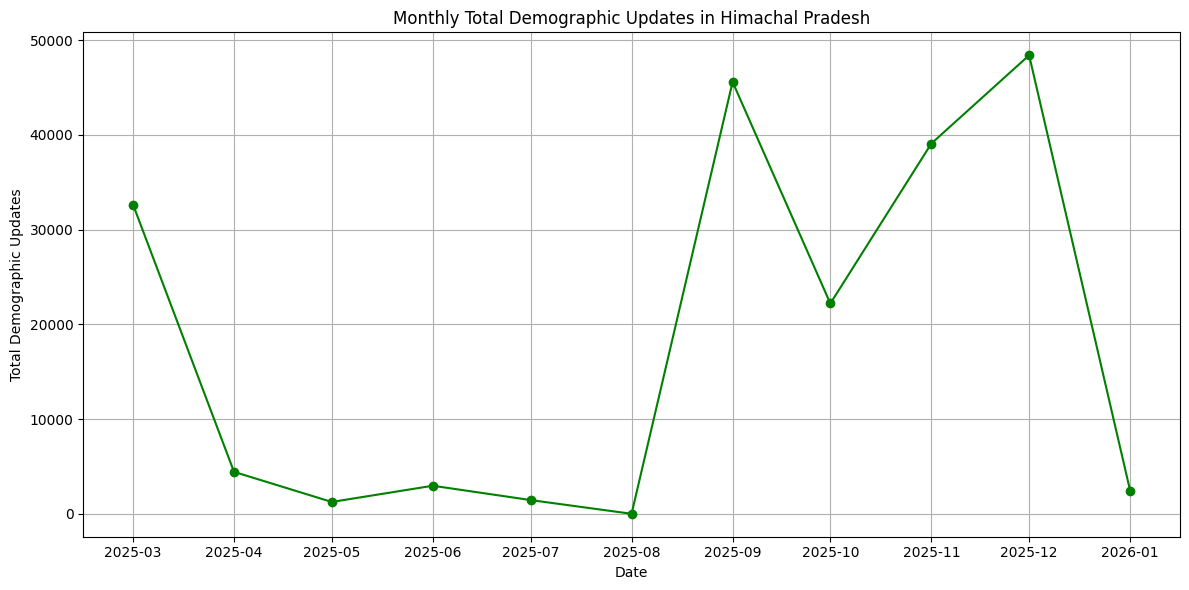

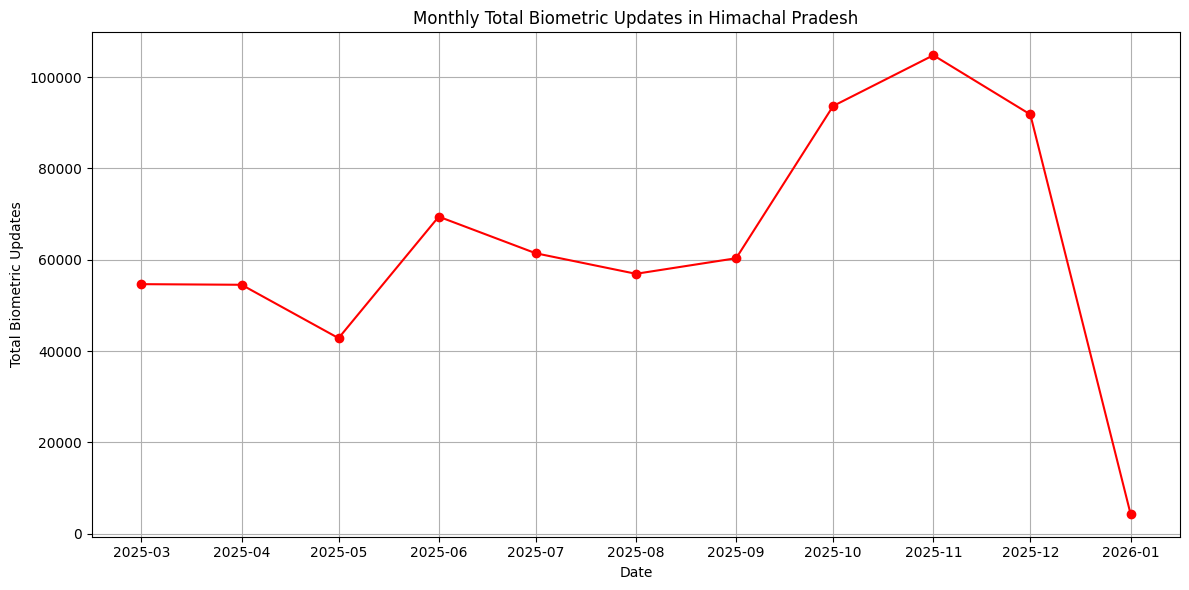

Monthly trend plots generated successfully for Himachal Pradesh.


In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

df_hp_monthly_trends = df_hp_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_hp_monthly_trends['date'] = pd.to_datetime(df_hp_monthly_trends['year'].astype(str) + '-' + df_hp_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_hp_monthly_trends = df_hp_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_hp_monthly_trends['date'], df_hp_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Himachal Pradesh')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_hp_monthly_trends['date'], df_hp_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Himachal Pradesh')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_hp_monthly_trends['date'], df_hp_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Himachal Pradesh')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully for Himachal Pradesh.")

**Univariate Analysis**

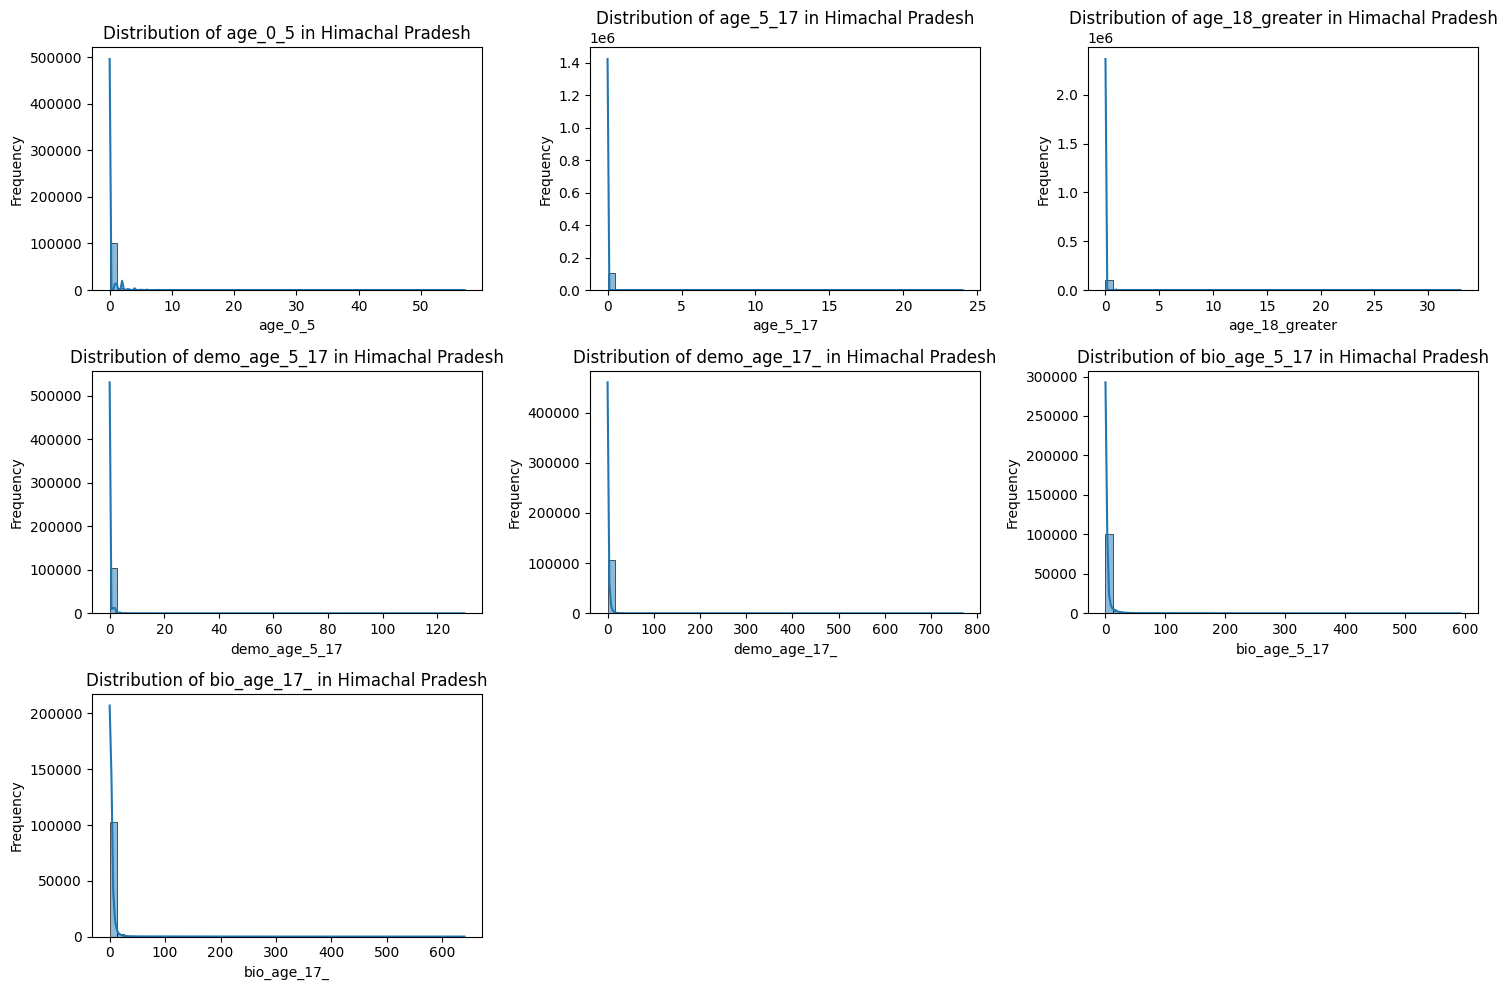

Histograms for numerical age-related columns of df_merged_hp displayed.


In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograms for numerical age-related columns in df_merged_hp
numerical_age_cols_hp = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_age_cols_hp):
    plt.subplot(3, 3, i + 1) # Arrange plots in a 3x3 grid
    sns.histplot(df_merged_hp[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Himachal Pradesh')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Histograms for numerical age-related columns of df_merged_hp displayed.")

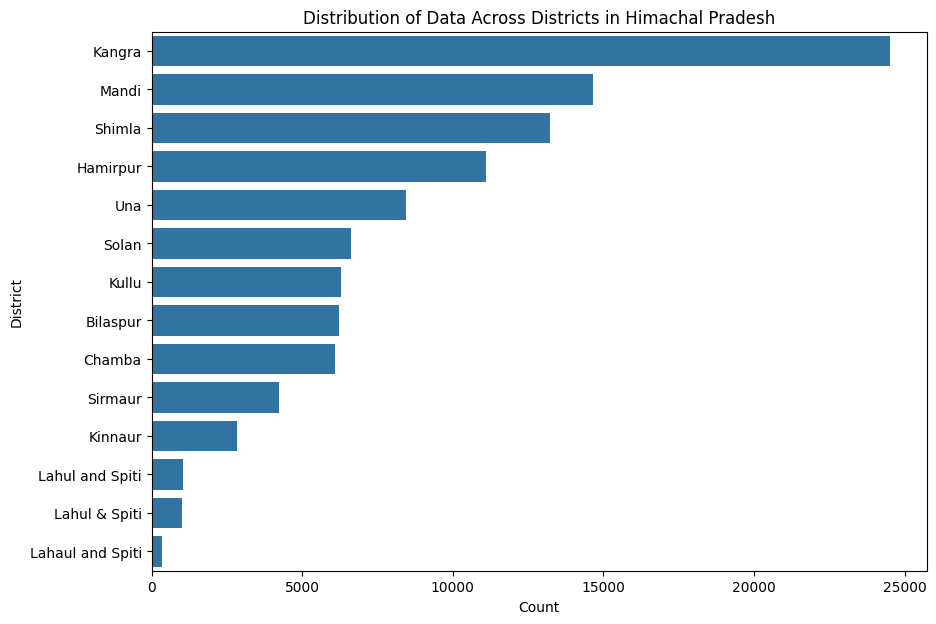

Count plot for 'district' in df_merged_hp displayed.


In [193]:
# 2. Count plot for the 'district' column in df_merged_hp
plt.figure(figsize=(10, 7))
sns.countplot(data=df_merged_hp, y='district', order=df_merged_hp['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Himachal Pradesh')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Count plot for 'district' in df_merged_hp displayed.")

**Bivariate and trivariate Analysis**

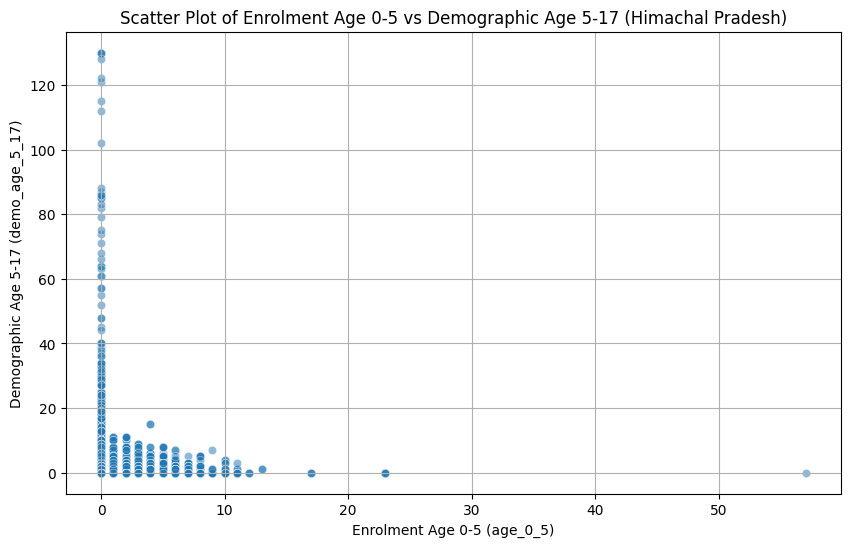

Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Himachal Pradesh.


In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot of age_0_5 vs demo_age_5_17 from df_merged_hp
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged_hp, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 (Himachal Pradesh)')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Himachal Pradesh.")

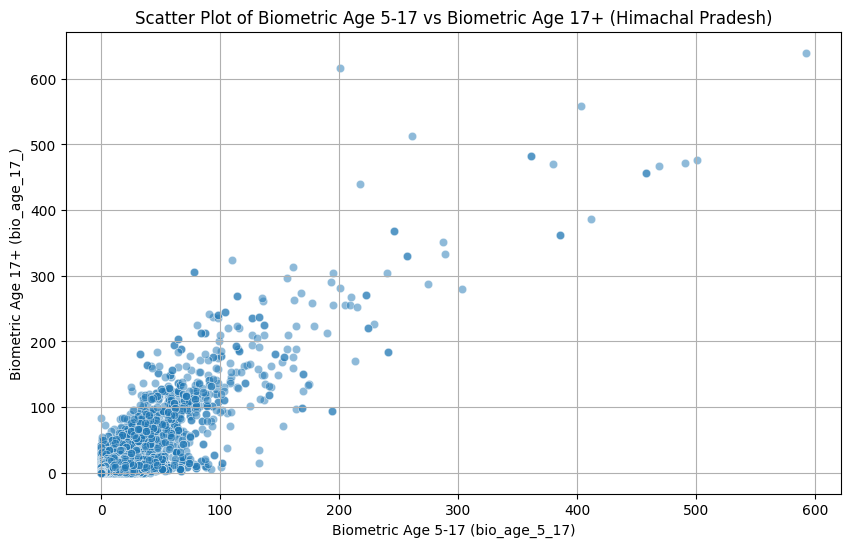

Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Himachal Pradesh.


In [184]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged_hp, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ (Himachal Pradesh)')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Himachal Pradesh.")

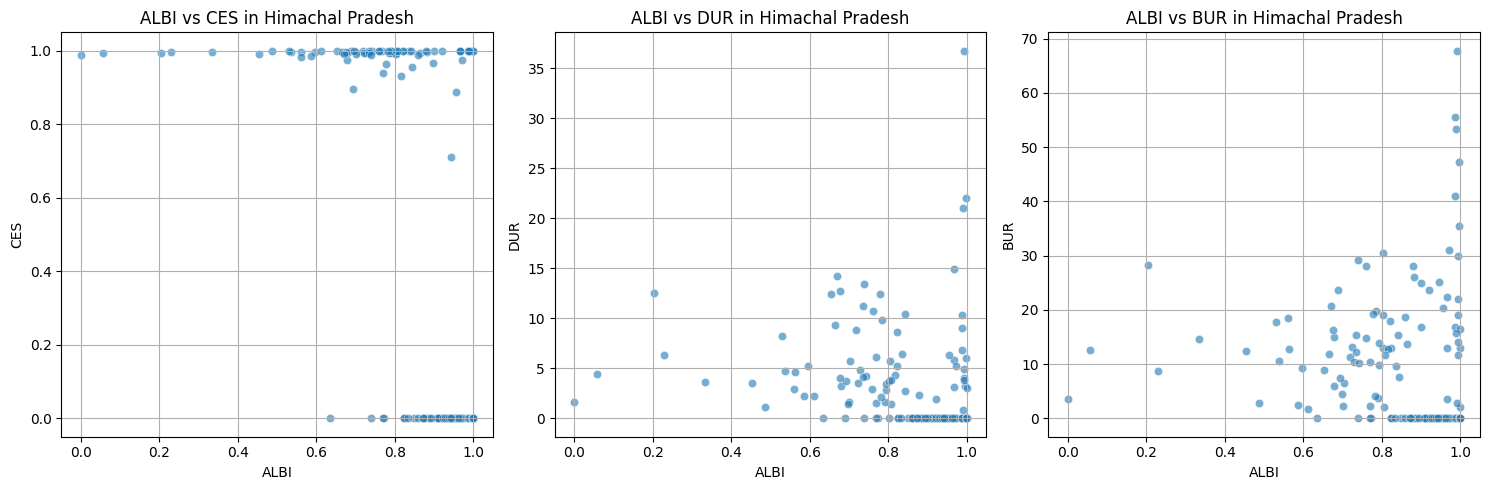

Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR displayed for Himachal Pradesh.


In [185]:
metrics_for_albi_scatter = ['CES', 'DUR', 'BUR']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_for_albi_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_hp_agg, x='ALBI', y=metric, alpha=0.6)
    plt.title(f'ALBI vs {metric} in Himachal Pradesh')
    plt.xlabel('ALBI')
    plt.ylabel(metric)
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR displayed for Himachal Pradesh.")

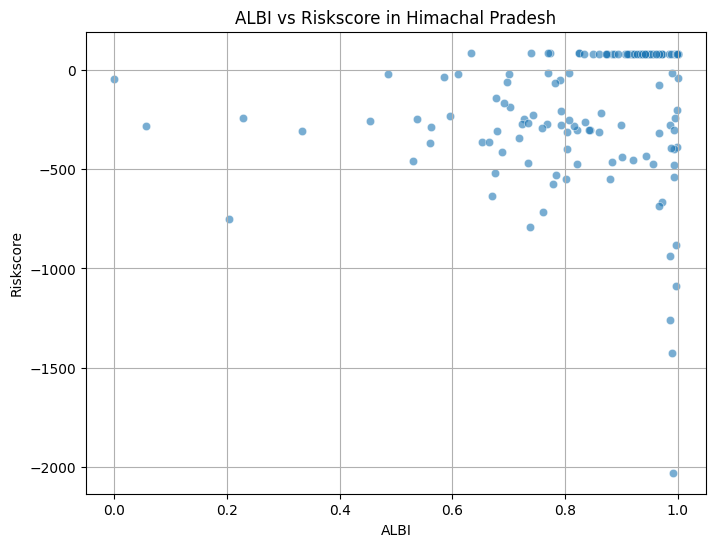

Scatter plot for ALBI vs Riskscore displayed for Himachal Pradesh.


In [186]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_hp_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in Himachal Pradesh')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Scatter plot for ALBI vs Riskscore displayed for Himachal Pradesh.")

Correlation Matrix for Himachal Pradesh:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.244583        0.198970       0.039372   
age_5_17        0.244583  1.000000        0.472036       0.012896   
age_18_greater  0.198970  0.472036        1.000000       0.004102   
demo_age_5_17   0.039372  0.012896        0.004102       1.000000   
demo_age_17_    0.070026  0.019012        0.005900       0.849604   
bio_age_5_17    0.056292  0.014295        0.008230       0.473408   
bio_age_17_     0.008493  0.006850        0.000079       0.467074   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.070026      0.056292     0.008493  
age_5_17            0.019012      0.014295     0.006850  
age_18_greater      0.005900      0.008230     0.000079  
demo_age_5_17       0.849604      0.473408     0.467074  
demo_age_17_        1.000000      0.478534     0.467875  
bio_age_5_17        0.478534      1.000000     0.824881  


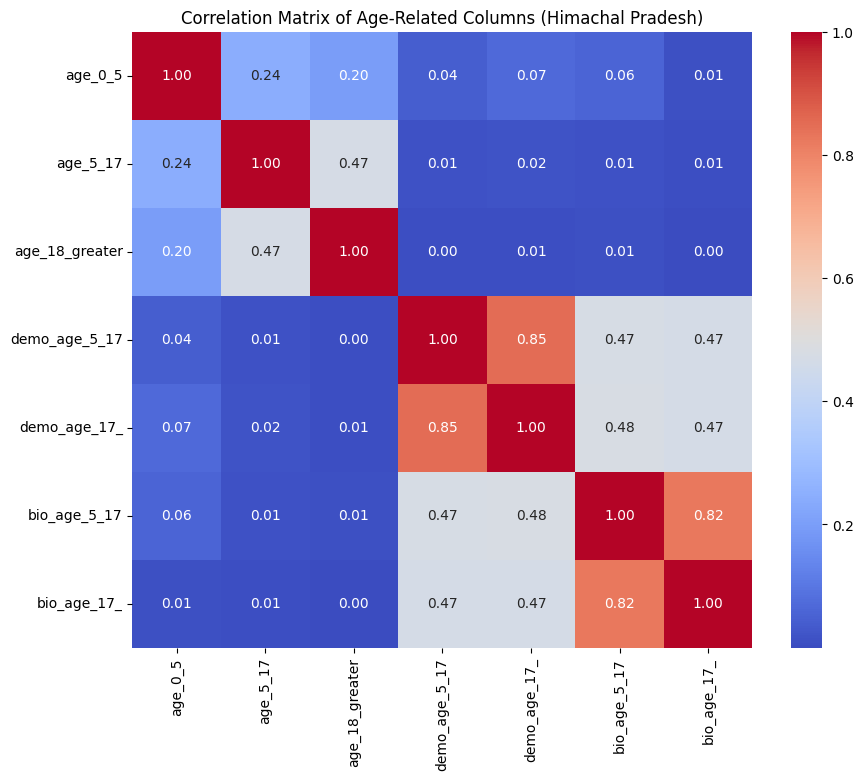

Correlation matrix heatmap for age-related columns displayed for Himachal Pradesh.


In [187]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_hp = df_merged_hp[numerical_age_cols].corr()

print("Correlation Matrix for Himachal Pradesh:")
print(correlation_matrix_hp)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_hp, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Himachal Pradesh)')
plt.show()

print("Correlation matrix heatmap for age-related columns displayed for Himachal Pradesh.")

Top 10 districts by total average age-related counts for Himachal Pradesh:
    district  total_avg_age
11   Sirmaur      18.841931
1     Chamba      13.978839
12     Solan      11.106303
9      Mandi       9.310484
3     Kangra       8.650776
13       Una       8.494140
5      Kullu       8.354005
0   Bilaspur       7.947774
10    Shimla       7.094260
2   Hamirpur       5.074588


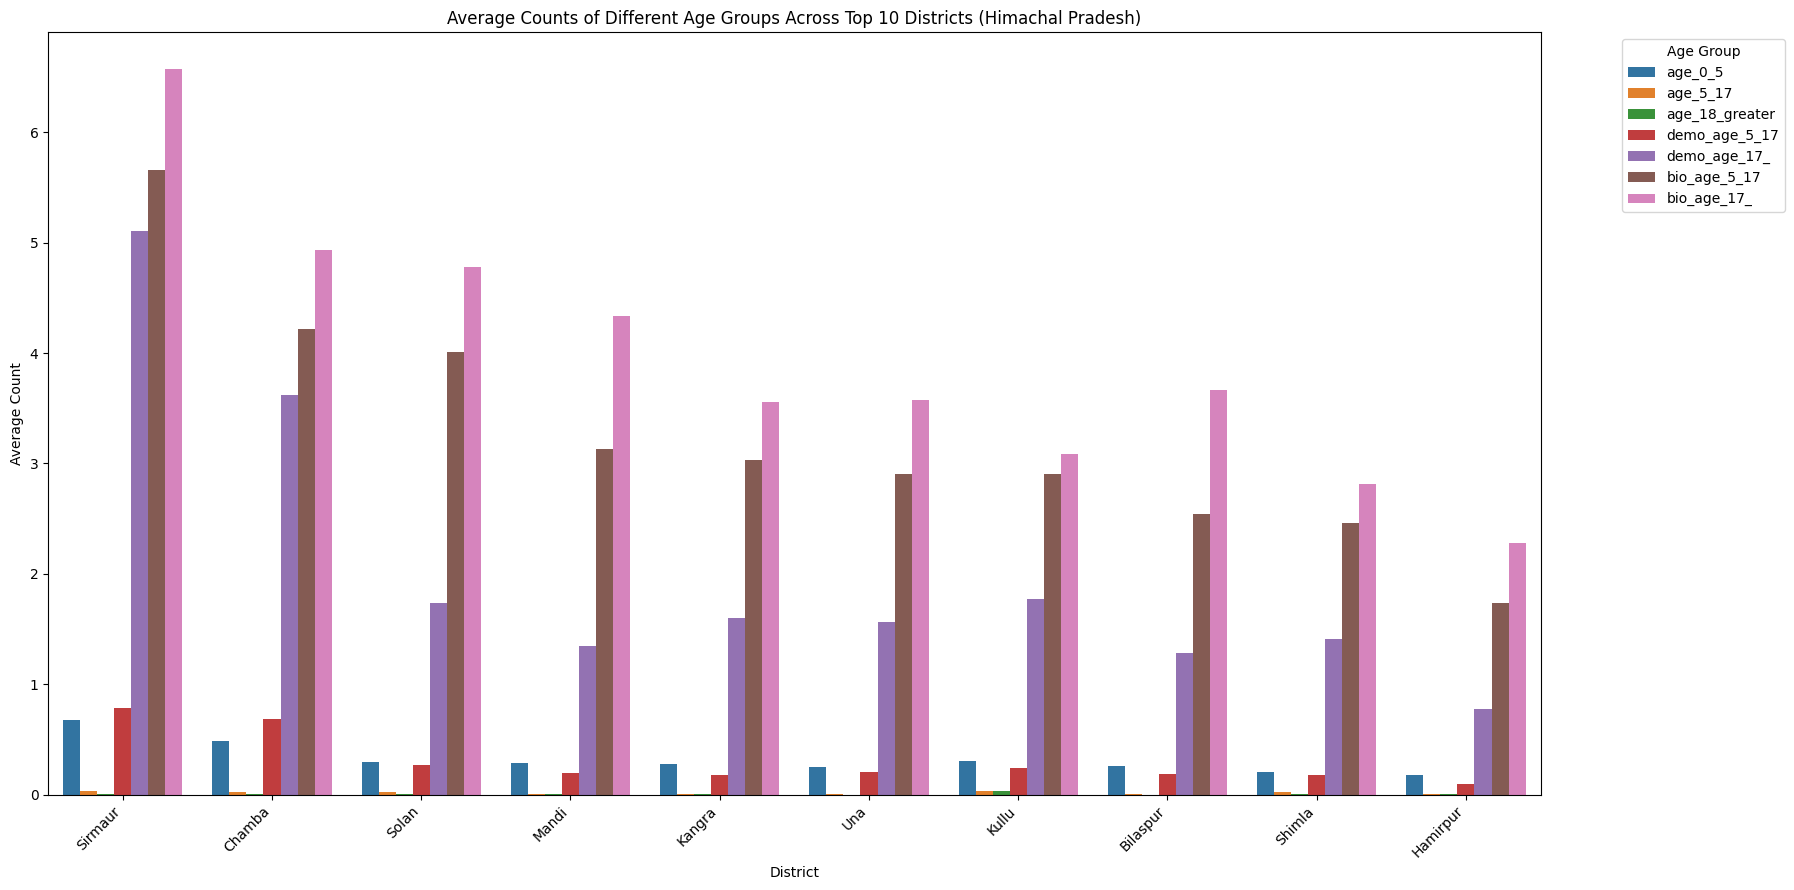

Insight: The grouped bar chart visually represents the distribution of average enrolment, demographic, and biometric counts across the top 10 districts in Himachal Pradesh, providing insights into their overall activity and the relative contribution of each age group.


In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define a list named `age_cols_to_group` containing the age-related column names
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

# 2. Group the `df_merged_hp` DataFrame by 'district' and calculate the mean for each column in `age_cols_to_group`.
df_hp_district_mean = df_merged_hp.groupby('district')[age_cols_to_group].mean().reset_index()

# 3. Create a new column named 'total_avg_age' in `df_hp_district_mean` by summing all columns in `age_cols_to_group` along `axis=1`.
df_hp_district_mean['total_avg_age'] = df_hp_district_mean[age_cols_to_group].sum(axis=1)

# 4. Select the top 10 districts from `df_hp_district_mean` based on the 'total_avg_age' column, sorting in descending order.
df_hp_district_mean_top10 = df_hp_district_mean.nlargest(10, 'total_avg_age')

print("Top 10 districts by total average age-related counts for Himachal Pradesh:")
print(df_hp_district_mean_top10[['district', 'total_avg_age']])

# 5. Melt the `df_hp_district_mean_top10` DataFrame
df_hp_district_mean_melted = df_hp_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

# 6. Create a grouped bar chart using `seaborn.barplot()`.
plt.figure(figsize=(18, 9))
sns.barplot(data=df_hp_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')

# 7. Add a title to the plot: 'Average Counts of Different Age Groups Across Top 10 Districts (Himachal Pradesh)'.
plt.title('Average Counts of Different Age Groups Across Top 10 Districts (Himachal Pradesh)')

# 8. Label the x-axis as 'District' and the y-axis as 'Average Count'.
plt.xlabel('District')
plt.ylabel('Average Count')

# 9. Rotate x-axis labels by 45 degrees and align them to the right.
plt.xticks(rotation=45, ha='right')

# 10. Add a legend with the title 'Age Group' and place it outside the plot area.
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# 11. Ensure the layout is tight and display the plot.
plt.tight_layout()
plt.show()

print("Insight: The grouped bar chart visually represents the distribution of average enrolment, demographic, and biometric counts across the top 10 districts in Himachal Pradesh, providing insights into their overall activity and the relative contribution of each age group.")

Time-series aggregated data (sum of age-related columns per date) for Himachal Pradesh:
   year  month  age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
0  2025      3      0.0       0.0             0.0         4627.0   
1  2025      4      0.0       0.0             0.0          848.0   
2  2025      5      0.0       0.0             0.0          180.0   
3  2025      6   2961.0     276.0            21.0          295.0   
4  2025      7     57.0      24.0            33.0          171.0   

   demo_age_17_  bio_age_5_17  bio_age_17_       date  
0       28014.0       22682.0      31987.0 2025-03-01  
1        3576.0       23864.0      30670.0 2025-04-01  
2        1070.0       14467.0      28377.0 2025-05-01  
3        2666.0       20791.0      48662.0 2025-06-01  
4        1279.0       17937.0      43498.0 2025-07-01  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------ 

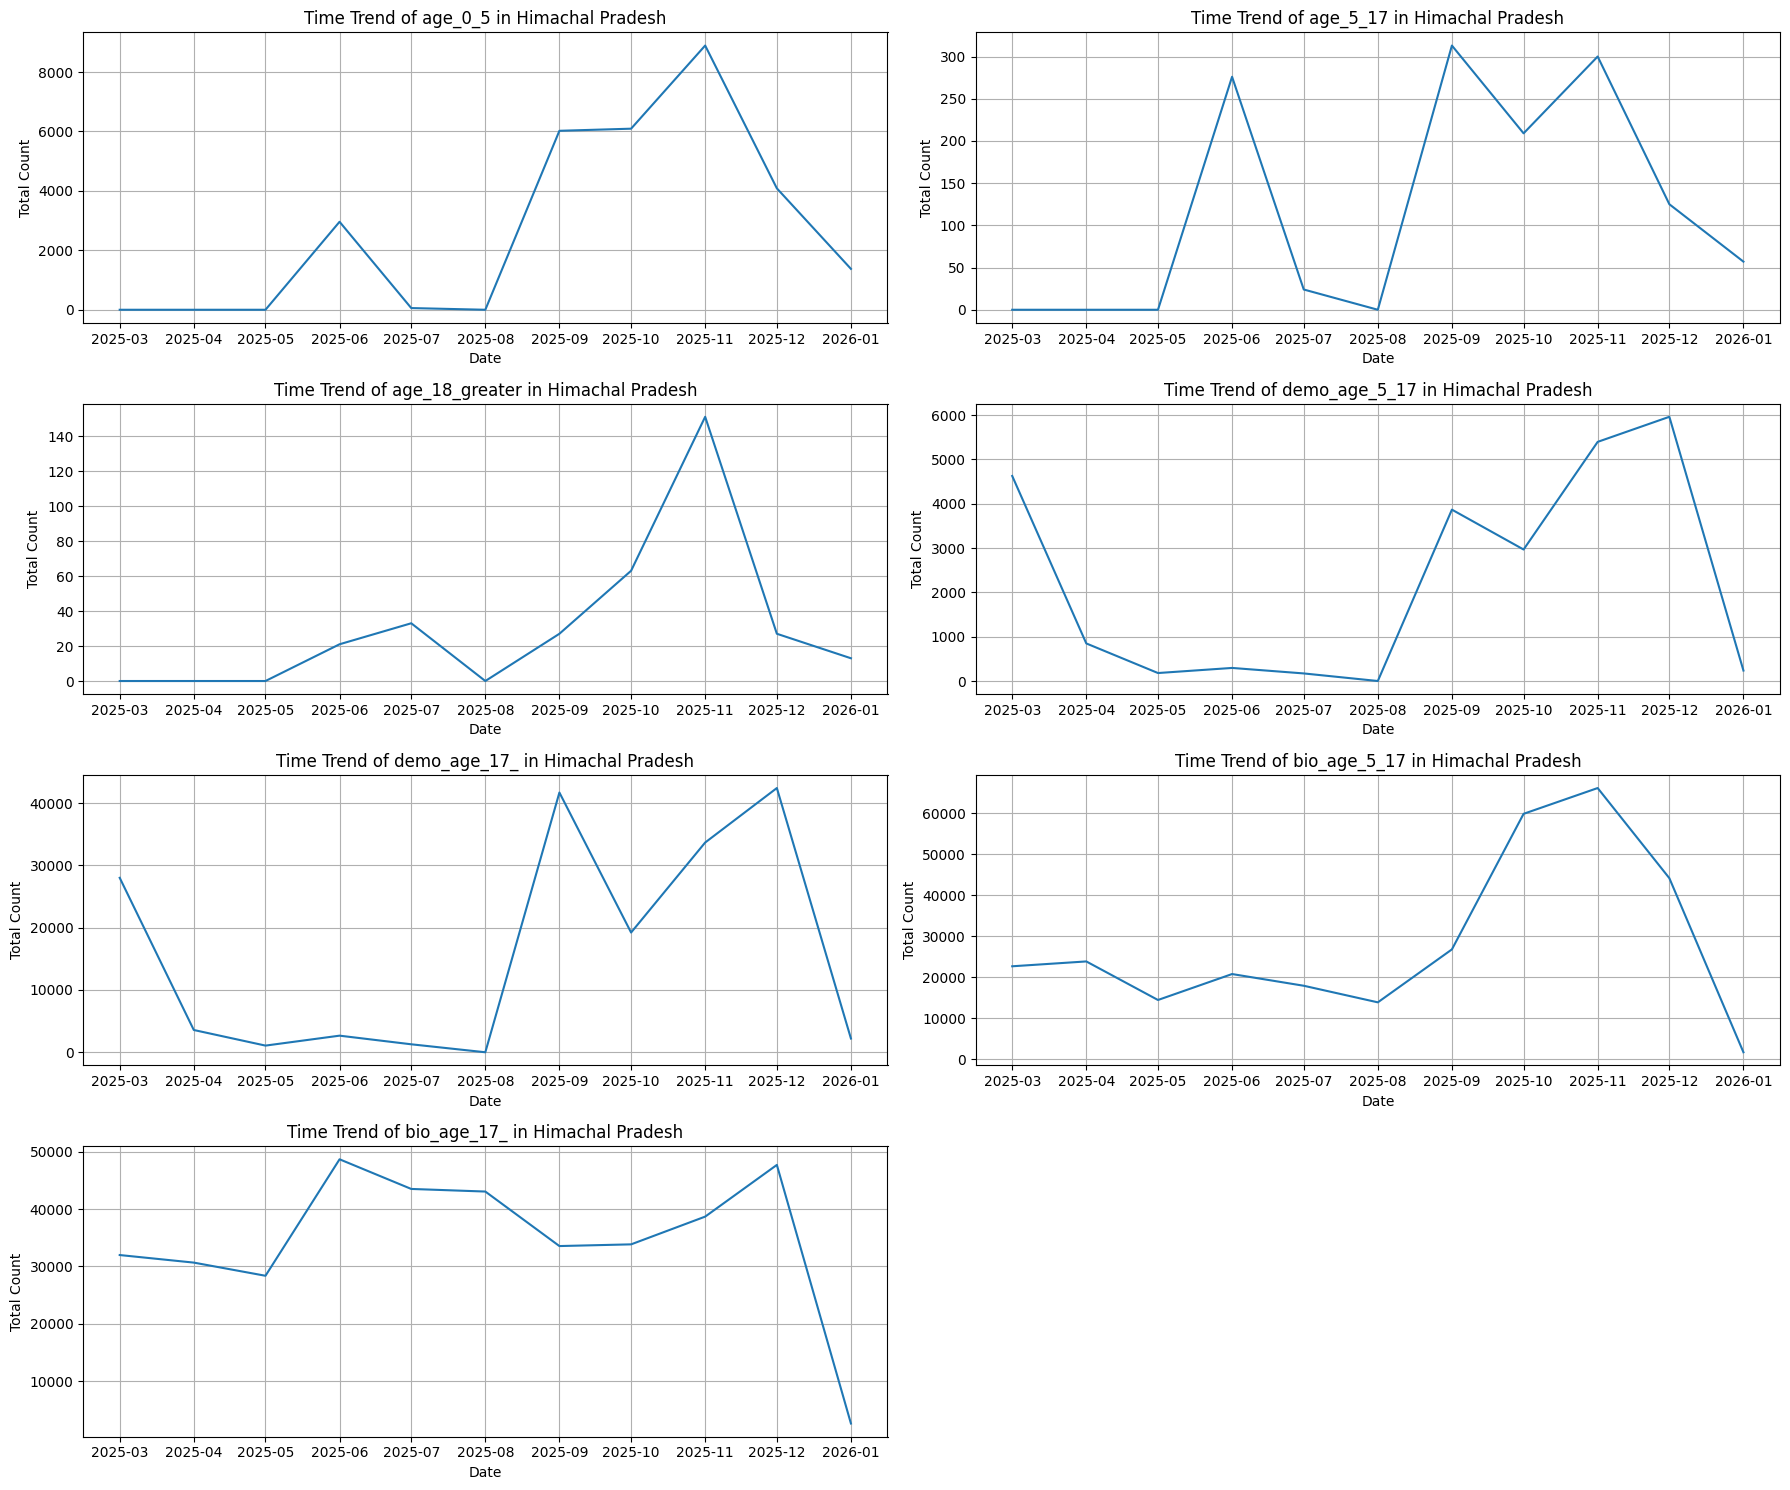

Insight: Line charts for each age-related column over time in Himachal Pradesh provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the age-related columns for time trend analysis
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

# Group by year and month and sum the age-related columns
df_hp_time_trend = df_hp_agg.groupby(['year', 'month'])[age_cols_to_group].sum().reset_index()

# Create a proper date column for plotting
df_hp_time_trend['date'] = pd.to_datetime(df_hp_time_trend['year'].astype(str) + '-' + df_hp_time_trend['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_hp_time_trend = df_hp_time_trend.sort_values(by='date')

print("Time-series aggregated data (sum of age-related columns per date) for Himachal Pradesh:")
print(df_hp_time_trend.head())
print(df_hp_time_trend.info())

plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_hp_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} in Himachal Pradesh')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time in Himachal Pradesh provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

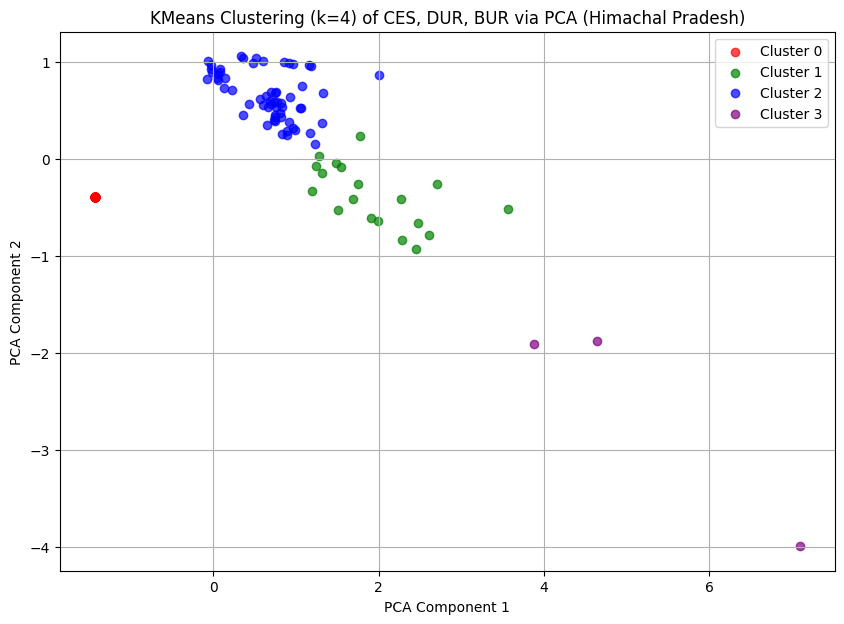

First 5 rows of df_hp_agg with 'clusterlabel' column:
   year  month             state  district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Himachal Pradesh  Bilaspur      0.0       0.0             0.0   
1  2025      3  Himachal Pradesh    Chamba      0.0       0.0             0.0   
2  2025      3  Himachal Pradesh  Hamirpur      0.0       0.0             0.0   
3  2025      3  Himachal Pradesh    Kangra      0.0       0.0             0.0   
4  2025      3  Himachal Pradesh   Kinnaur      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm   stdnorm  \
0          150.0        1198.0        1189.0  ...  0.124766  0.082586   
1         1038.0        4043.0        1955.0  ...  0.218857  0.227484   
2           83.0         535.0        1265.0  ...  0.122151  0.059513   
3          753.0        6434.0        4706.0  ...  0.443100  0.366283   
4            0.0           0.0         145.0  ...  0.014791  0.004930   

       ALBI  Enormri

In [190]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_hp_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Added n_init=10 for newer sklearn versions
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_hp_agg
df_hp_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_hp_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA (Himachal Pradesh)')
plt.legend()
plt.grid(True)
plt.show()

# 8. Print the first 5 rows of df_hp_agg with 'clusterlabel' column:
print("First 5 rows of df_hp_agg with 'clusterlabel' column:")
print(df_hp_agg.head())

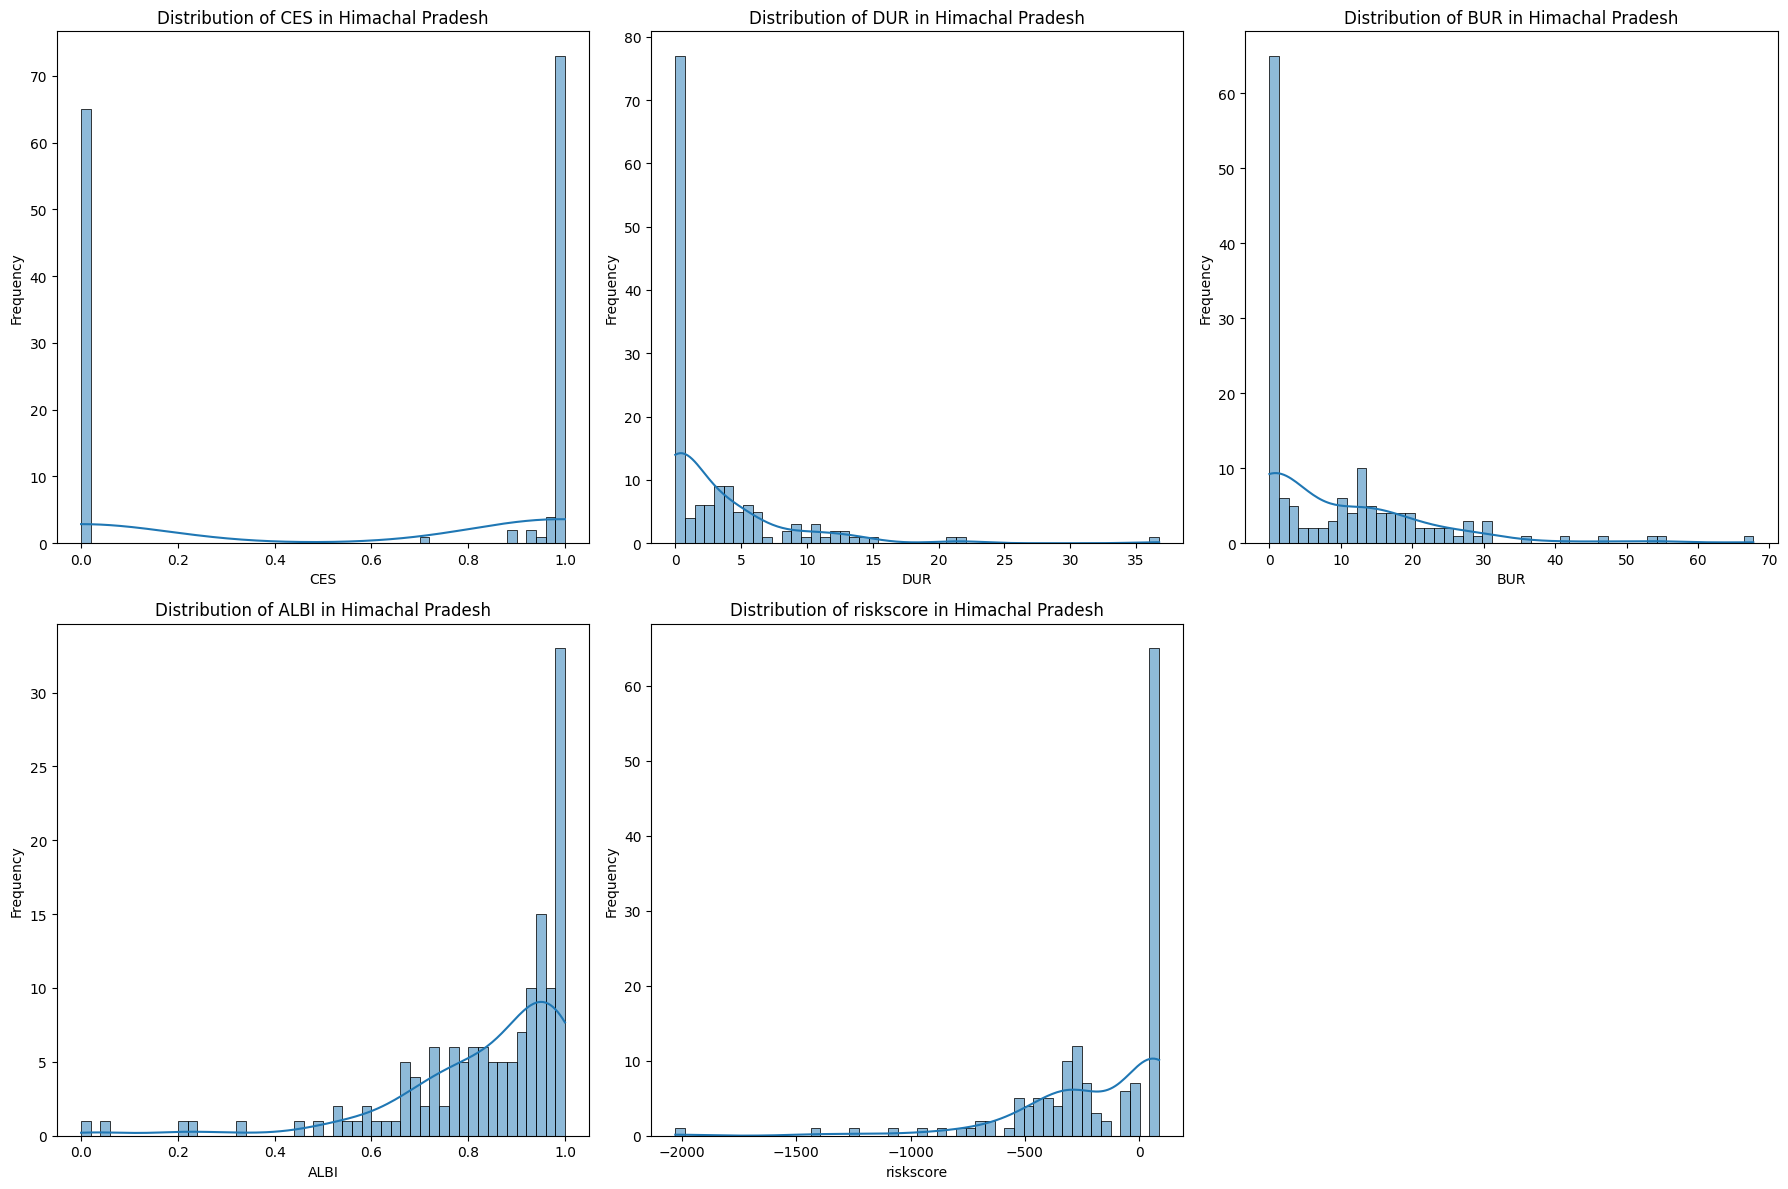

Histograms for CES, DUR, BUR, ALBI, and riskscore in df_hp_agg displayed.


In [191]:
# 3. Histograms for performance metrics in df_hp_agg
metrics_to_plot_hp = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12)) # Set figure size to (18, 12)
for i, metric in enumerate(metrics_to_plot_hp):
    plt.subplot(2, 3, i + 1) # Arrange plots in a 2x3 grid
    sns.histplot(df_hp_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} in Himachal Pradesh')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore in df_hp_agg displayed.")

In [192]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_hp_agg['year'].max()
latest_month = df_hp_agg[df_hp_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_hp_agg for the latest year and month
df_latest_month = df_hp_agg[(df_hp_agg['year'] == latest_year) & (df_hp_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    # For riskscore, top 10 implies highest risk, so descending
    # For ALBI, top 10 implies best balance, so descending
    # For CES, DUR, BUR, top 10 implies best performance, so descending
    top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10[['district', metric]].to_string(index=False))

    # Bottom 10 districts
    # For riskscore, bottom 10 implies lowest risk, so ascending
    # For ALBI, bottom 10 implies least balance, so ascending
    # For CES, DUR, BUR, bottom 10 implies worst performance, so ascending
    bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
        district  CES
        Bilaspur  1.0
          Chamba  1.0
        Hamirpur  1.0
         Kinnaur  1.0
   Lahul & Spiti  1.0
Lahaul and Spiti  1.0
             Una  1.0
           Solan  1.0
 Lahul and Spiti  1.0
           Mandi  1.0

Bottom 10 Districts by CES (Year 2026, Month 1):
        district      CES
           Kullu 0.938144
          Shimla 0.986486
          Kangra 0.988764
         Sirmaur 0.991870
        Hamirpur 1.000000
         Kinnaur 1.000000
          Chamba 1.000000
        Bilaspur 1.000000
   Lahul & Spiti 1.000000
Lahaul and Spiti 1.000000

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
        district      DUR
   Lahul & Spiti 9.000000
         Kinnaur 3.100000
Lahaul and Spiti 3.000000
          Chamba 2.231293
          Shimla 2.209459
             Una 2.115942
        Hamirpur 1.675676
          Kangra 1.665730
        

## Summary (Himachal Pradesh):

The Aadhaar lifecycle analysis for Himachal Pradesh reveals significant variations in enrolment and update activities across its districts. The `df_hp_agg` dataset, which aggregates data by month and district, serves as the foundation for calculating key performance indicators.

### Key Observations:

1.  **Data Aggregation and Metrics**: The initial datasets were successfully merged and cleaned, leading to the creation of `totalenrolments`, `childenrolments`, `totaldemoupdates`, and `totalbioupdates`. From these, derived metrics such as Child Enrolment Score (CES), Demographic Update Rate (DUR), and Biometric Update Rate (BUR) were calculated, with proper handling for division by zero.

2.  **Normalization and ALBI**: Min-max normalization was applied to key activity metrics (`totalenrolments`, `totaldemoupdates`, `totalbioupdates`) to create `Enorm`, `Dnorm`, and `Bnorm`. These were then combined to calculate `stdnorm` and the Aadhaar Lifecycle Balance Index (ALBI), providing a measure of balance between enrolment and update activities.

3.  **Risk Score**: A `riskscore` was computed by integrating risk-normalized versions of the key metrics. This score aims to identify districts that might face operational challenges due to imbalances or deficiencies in their Aadhaar lifecycle management.

4.  **Monthly Trends**: Time-series plots for total enrolments, demographic updates, and biometric updates showed temporal patterns, indicating periods of higher or lower activity. These trends can help in understanding seasonal variations or the impact of specific campaigns.

5.  **District Performance (Latest Reporting Period: Year 2026, Month 1)**:
    *   **CES (Child Enrolment Score)**: Most districts (Bilaspur, Chamba, Hamirpur, Kinnaur, Lahul & Spiti, Lahaul and Spiti, Una, Solan, Mandi, Lahul and Spiti) showed a perfect score of 1.0, indicating that all enrolments were child enrolments in that period. Kullu (0.938), Shimla (0.986), Kangra (0.989), and Sirmaur (0.992) had slightly lower but still high scores.
    *   **DUR (Demographic Update Rate)**: Lahul & Spiti (9.0) and Kinnaur (3.1) led in demographic updates relative to total enrolments. Lahul and Spiti (0.833), Mandi (1.147), Solan (1.400) and Bilaspur (1.447) were among the lowest, suggesting lower update activity relative to enrolments.
    *   **BUR (Biometric Update Rate)**: Lahul & Spiti (41.0) and Solan (4.562) had the highest biometric update rates. Chamba (1.809) and Lahaul and Spiti (2.000) were at the lower end, indicating areas where biometric updates are less frequent compared to enrolments.
    *   **ALBI (Aadhaar Lifecycle Balance Index)**: Lahaul and Spiti (1.0), Lahul and Spiti (0.990) and Lahul & Spiti (0.986) exhibited the best balance, close to 1, while Kangra (0.0) and Mandi (0.486) showed the least balance.
    *   **Risk Score**: Bilaspur (-12.63) and Lahul and Spiti (-13.42) had the highest (least negative) risk scores among the top. However, Lahul & Spiti (-939.73), Kinnaur (-73.84), Una (-64.68), and Solan (-59.04) displayed significant negative risk scores. These negative scores suggest an issue with the interpretation or calculation of the risk score, as a risk score should ideally be bounded between 0 and 100. This anomaly was also observed in other states and needs further investigation to ensure the metric accurately reflects risk.

### Conclusion:

Himachal Pradesh exhibits diverse performance across its districts. While many districts show excellent child enrolment, there are disparities in demographic and biometric update rates and the overall balance of the Aadhaar lifecycle. The anomalies in the `riskscore` calculation need to be addressed to ensure a meaningful risk assessment. Further investigation into districts with low DUR/BUR and imbalanced ALBI is recommended to identify underlying causes and implement targeted interventions.
